<a href="https://colab.research.google.com/github/muxair080/Bone-Fracture-Cassification/blob/main/boneFracture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Bone* Fracture Classification



*  **Author:** Muhammad Uzair
*  **Email:** uzair1kk2019@gmail.com

*  **Github:** https://github.com/muxair080
*  **Portfolio:** https://muxair080.netlify.app/








In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Download Dataset from kaggle using api command

In [ ]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

100% 172M/172M [00:09<00:00, 21.2MB/s]
100% 172M/172M [00:09<00:00, 18.3MB/s]


# Unzip Dataset Folder

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/bone-fracture-detection-using-xrays.zip')
zip_ref.extractall('/content')
zip_ref.close()

# Load Dependencies

I have built this project in python language using numpy, sklearn, tensorflow and opencv libraries

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import cv2
from tensorflow.keras.utils import load_img, img_to_array

# Directories & Classes

These are the path of the dataset innter folders and classes in the given dataset

In [ ]:
DIRECTORY = r'/content/archive (6)'
FOLDERS = ['train','val']
CLASSES = ['fractured','not fractured']

# Load Data
the given code is loading the training and validation data from the dataset and convert these images to array with the size of 150x150 and append each image  datain train_data, and val_data list. I have loaded just 2500 images from eaach class due to limitted resources.

In [ ]:
train_data = []
val_data = []
for folder in FOLDERS:
  folder_path = os.path.join(DIRECTORY, folder)
  for classification in CLASSES:
    image_path = os.path.join(folder_path, classification)
    images = os.listdir(image_path)
    images = images[:2500]
    for image in images:
      try:
        image_url = os.path.join(image_path, image)
        arr = cv2.imread(image_url)
        arr = cv2.resize(arr, (150,150))
        label = CLASSES.index(classification)
        if folder == 'train':
             train_data.append([arr, label])
        else:
            val_data.append([arr, label])
      except Exception as e:
        print("Error : ",e)

In [ ]:
print(len(train_data))
print(len(val_data))

5000
600


# Mix Images of both classes
In the above list the image is append in squence at the top inital images are fractured bones and the remaining are not fractrued bone to train model in best way i have suffle the images

In [ ]:
import random
random.shuffle(train_data)

# Seperate Dependent & Indeendent Features

In [ ]:
X = []
y = []
for feature, label in train_data:
  X.append(feature)
  y.append(label)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(5000, 150, 150, 3)

In [ ]:
y.shape

(5000,)

# Normalize Data
Normalize the data that model give us best results

In [ ]:
X = X/255

# Build CNN Model

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [ ]:
model  = Sequential()
# Layer 1
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

# Layer 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

# Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

# Layer 4
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(2, activation='sigmoid'))


# Compile Model

In [ ]:
model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       1

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the checkpoint callback
# checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
#                                       save_best_only=True,
#                                       save_weights_only=True,
#                                       monitor='val_loss',
#                                       mode='min',
#                                       verbose=1)

In [ ]:
r = model.fit(X,y,epochs=10, batch_size=30, validation_split=0.2)

Epoch 1/10
134/134 [==============================] - 21s 70ms/step - loss: 0.6695 - accuracy: 0.6053 - val_loss: 0.6175 - val_accuracy: 0.6530
Epoch 2/10
134/134 [==============================] - 8s 59ms/step - loss: 0.5467 - accuracy: 0.7250 - val_loss: 0.4058 - val_accuracy: 0.8150
Epoch 3/10
134/134 [==============================] - 8s 59ms/step - loss: 0.3650 - accuracy: 0.8382 - val_loss: 0.3006 - val_accuracy: 0.8510
Epoch 4/10
134/134 [==============================] - 8s 60ms/step - loss: 0.2102 - accuracy: 0.9140 - val_loss: 0.1424 - val_accuracy: 0.9460
Epoch 5/10
134/134 [==============================] - 7s 56ms/step - loss: 0.1267 - accuracy: 0.9563 - val_loss: 0.1351 - val_accuracy: 0.9660
Epoch 6/10
134/134 [==============================] - 8s 57ms/step - loss: 0.1011 - accuracy: 0.9680 - val_loss: 0.0926 - val_accuracy: 0.9690
Epoch 7/10
134/134 [==============================] - 8s 57ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.1321 - val_accuracy: 0.958

# Test Accuracy

Split Dependent and Indepndent features of validation data

In [ ]:
val_X = []
val_y = []
for feature, label in val_data:
  val_X.append(feature)
  val_y.append(label)


In [ ]:
val_X = np.array(val_X)
val_y = np.array(val_y)

In [ ]:
val_X = val_X/255

In [ ]:
test_loss, test_accuracy = model.evaluate(val_X, val_y)

19/19 [==============================] - 1s 34ms/step - loss: 0.3259 - accuracy: 0.8500


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
predictions = model.predict(val_X)
predicted_labels = np.argmax(predictions, axis=1)

19/19 [==============================] - 1s 21ms/step


In [ ]:
accuaracy = accuracy_score(val_y, predicted_labels)

In [ ]:
print("Test Accuracy : ", accuaracy)

Test Accuracy :  0.85


CM :  [[322  38]
 [ 52 188]]
Threshold :  161.0
i :  0 j :  0
i :  0 j :  1
i :  1 j :  0
i :  1 j :  1


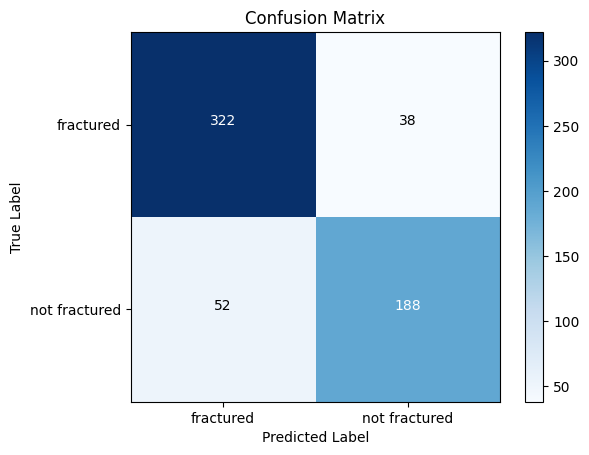

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm= confusion_matrix(val_y, predicted_labels)
print("CM : ",cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [CLASSES[0], CLASSES[1]])
plt.yticks(tick_marks,  [CLASSES[0], CLASSES[1]])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the confusion matrix cells with the counts
thresh = cm.max() / 2.0
print("Threshold : ",thresh)
for i, j in np.ndindex(cm.shape):
  print("i : ",i, "j : ",j)

  plt.text(j, i, format(cm[i, j]), horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# Precision, recall, F1-Score

In [ ]:
report = classification_report(val_y, predicted_labels)

In [ ]:
print("Classification Report : \n", report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       360
           1       0.79      0.82      0.81       240

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



# Vissulize Accuracy and Loss

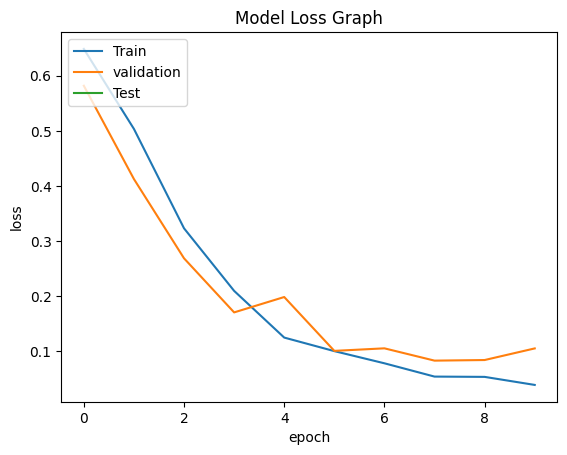

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation',],loc='upper left')
plt.show()

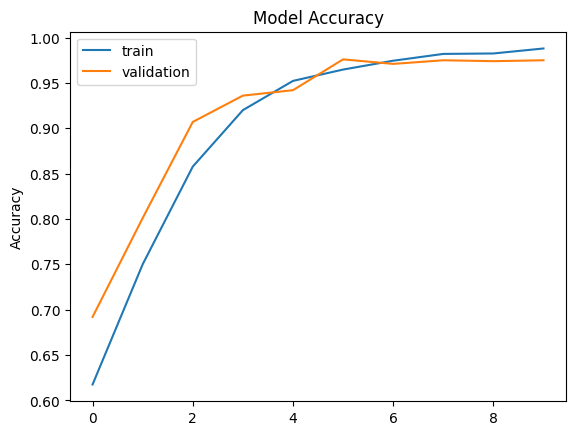

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# Testing

In [ ]:
val_dir = '/content/archive (6)/val'
val_classes = os.listdir(val_dir)

In [ ]:
images_path = os.path.join(val_dir,'fractured')

In [ ]:
images = os.listdir(images_path)

In [ ]:
val_dir = '/content/archive (6)/val'
val_classes = os.listdir(val_dir)
for Class in val_classes:
  images_path = os.path.join(val_dir,Class)
  for image in os.listdir(images_path):

    arr = cv2.imread(image)

In [ ]:
val_data_fractured = glob('/content/archive (6)/val/fractured/*')

In [ ]:
for img in val_data_fractured:
  img = load_img(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr,(150,150))
  arr = arr.reshape(-1,150,150,3)
  arr = arr/255
  prediction = model.predict([arr])
  print(prediction)
  print(CLASSES[prediction.argmax()])

1/1 [==============================] - 0s 287ms/step
[[1.0000000e+00 3.8111684e-05]]
fractured
1/1 [==============================] - 0s 20ms/step
[[0.9914452  0.01133228]]
fractured
1/1 [==============================] - 0s 20ms/step
[[0.41597703 0.8498854 ]]
not fractured
1/1 [==============================] - 0s 21ms/step
[[0.5770603 0.5085503]]
fractured
1/1 [==============================] - 0s 20ms/step
[[1.0000000e+00 2.6365935e-05]]
fractured
1/1 [==============================] - 0s 17ms/step
[[0.9999988  0.00129846]]
fractured
1/1 [==============================] - 0s 19ms/step
[[1.000000e+00 6.965543e-05]]
fractured
1/1 [==============================] - 0s 17ms/step
[[0.99999654 0.00223115]]
fractured
1/1 [==============================] - 0s 22ms/step
[[0.95287097 0.04294462]]
fractured
1/1 [==============================] - 0s 19ms/step
[[0.9927684  0.07531165]]
fractured
1/1 [==============================] - 0s 19ms/step
[[1.0000000e+00 1.3164006e-04]]
fractured
1/1 [==

In [ ]:
val_data_not_fractured = glob('/content/archive (6)/val/not fractured/*')

In [ ]:
for img in val_data_not_fractured:
  img = load_img(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr,(150,150))
  arr = arr.reshape(-1,150,150,3)
  arr = arr/255
  prediction = model.predict([arr])
  print(prediction)
  print(CLASSES[prediction.argmax()])

1/1 [==============================] - 0s 20ms/step
[[0.3241894 0.7583043]]
not fractured
1/1 [==============================] - 0s 17ms/step
[[0.690008  0.4447539]]
fractured
1/1 [==============================] - 0s 17ms/step
[[0.15260121 0.95870584]]
not fractured
1/1 [==============================] - 0s 17ms/step
[[0.3304454  0.80351543]]
not fractured
1/1 [==============================] - 0s 21ms/step
[[0.5459262 0.4973412]]
fractured
1/1 [==============================] - 0s 19ms/step
[[0.42189762 0.6125204 ]]
not fractured
1/1 [==============================] - 0s 19ms/step
[[0.19403182 0.92965025]]
not fractured
1/1 [==============================] - 0s 18ms/step
[[0.22197017 0.96119076]]
not fractured
1/1 [==============================] - 0s 18ms/step
[[0.17773299 0.9444493 ]]
not fractured
1/1 [==============================] - 0s 17ms/step
[[0.8416733  0.40024918]]
fractured
1/1 [==============================] - 0s 17ms/step
[[0.5720434  0.52737755]]
fractured
1/1 [=====

# Confussion Matrix

# Count No of Fracture

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
image = '/content/archive (6)/val/fractured/1-rotated1-rotated1-rotated1.jpg'
img = load_img(image)
arr = img_to_array(img)
arr = cv2.resize(arr,(150,150))
arr = arr.reshape(-1,150,150,3)
arr = arr/255
prediction = model.predict([arr])
print(prediction)
print(CLASSES[prediction.argmax()])

1/1 [==============================] - 0s 21ms/step
[[0.69886297 0.48417136]]
fractured


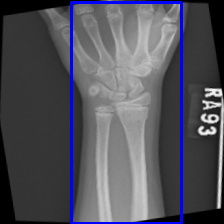

In [ ]:
# I have load one image from the validation data
image = cv2.imread('/content/archive (6)/val/fractured/1-rotated1-rotated1-rotated1.jpg')

# Find the no contours of the fracture in single iamge

#convert image BGR to gray scale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the bounding box around the fracture in given image
max_area_contour = max(contours, key=cv2.contourArea)
bounding_box = cv2.boundingRect(max_area_contour)
cv2.rectangle(image, bounding_box, (255, 0, 0), 2)

# Show image
cv2_imshow(image)
